# UMAP

Uniform Manifold Approximation and Porjection (UMAP) is a dimensionality reduction technique that uses manifold learning. As such it tends to keeps similar items together topologically. It tries to preserve both globl and the local strucutre as opposed to t-SNE which favors local structure. 

Normalization of features is a good idea to get values on the same scale.

UMAP is very sensitive to hyperparameters ( `n_neighbors`, `min_dist`, `n_components`, or `metric`). 

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/MLpracticals

/content/drive/My Drive/MLpracticals


In [4]:
X = pd.read_excel('X.xls')
y = pd.read_excel('y.xls')

In [5]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=ac10b8b104a9ca6d995e7f42416e59c92406a25d1044a75e9f5aa81dfe06d1aa
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=2d6fe4ecc42f57b7ac3cb611b14361a6bb512084f6607558795d456193cca91c
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [6]:

import umap.umap_ as umap

u = umap.UMAP(random_state = 42)
X_umap = u.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [7]:
X_umap.shape

(1309, 2)

__Instance parameters__


* `n_neighbors` Local neighborhood size. Larger means use a global view, smaller means more local. 

* `n_components = 2` Number of dimensions for embedding
* `metric = 'euclidean'` Metric to use for distance. Can be a function that accepts two 1D arrays and returns a float
* `n_epochs` Number of training epoches. Default will be 200 or 500 depending on the size of data
* `learning_rate = 1.0` Learning rate for embedding optimization 
* `init = 'Spectral'` Initialization type. Spectral embedding is the default. Can be 'random' or a numpy array of locations. 
* `min_dist = .1` Between 0 and 1. Minimum distance between embedded points. Smaller means more clumps, larger means more spread out. 
* `spread = 1.0` Determines distance of embedded points. 
* `set_op_mix_ratio = 1.0` Between 0 and 1: fuzzy union (1) or fuzzy intersection (0) 
* `local_connectivity = 1.0` Number of neighbors for local connectivity. As this goes up, more local connections are created. 
* `repulsion_strength = 1.0` Repulsion strength. Higher value as more repulsion, more optimization costs, and better accuracy. 
* `negative_sample_rate = 5` Negative samples per positive sample. Higher value has more repulsion, more optimization costs, and better accuracy. 
* `transform_queue_size = 4.0` Aggressiveness for nearest neighbors search. Higher values is lower performance but better accuracy. 
* `a = None` Parameter to control embedding. If equal to None, UMAP determines these from `min_dist` and `spread. 
* `b = None` Parameter to control embedding. If equal to None, UMAP determines these from `min_dist` and `spread. 
* `random_state = None` Random seed. 
* `metric_kwds = None` Metrics dictionary for additional parameters if function is used for metric. Also `minkowski` and others can be parametrized with this. 
* `angular_rp_forest = False` Use angular random projection. 
* `target_n_neighbors = -1` Number of neighbors for simplicity set. 
* `target_metric = categorical` For using supervised reduction. Can also be 'L1' or 'L2'. Also supports a function that takes two arrays from X as input and returns the distance value between them. 
* `target_metric_kwds` = Metrics dictionary to use if function is used for `target metric` 
* `target_weight = 0.5` Weighting factor. Between 0.0 and 1.0 where 0 means base on data only, and 1 means base on target only. 
* `transform_seed = 42` Randomseed for transform operations. 
* `verbose = False` Verbosity

__Attributes__

* `embedding` the embedding results 

In [8]:
import matplotlib.pyplot as plt

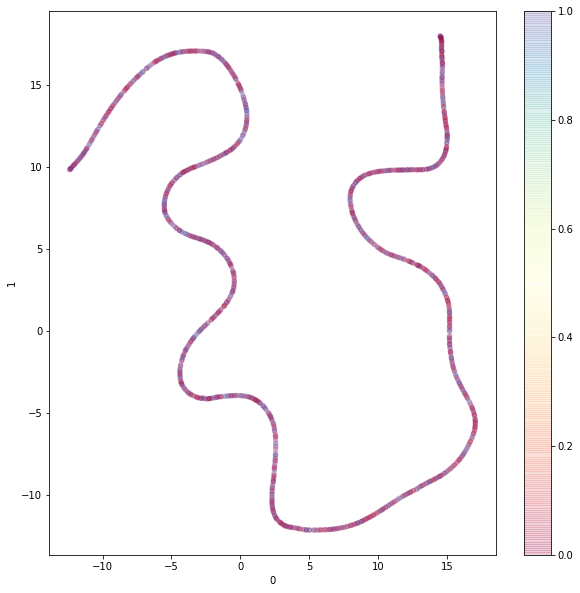

In [9]:
fig, ax = plt.subplots(figsize =(10,10))
pd.DataFrame(X_umap).plot(kind = 'scatter', x = 0, y = 1, ax = ax, c = y.survived, alpha = .2, cmap = 'Spectral')

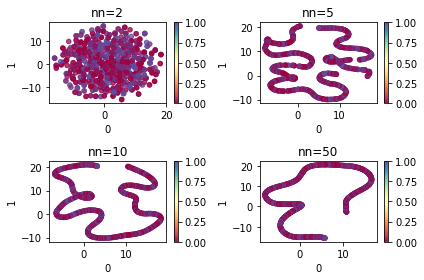

In [10]:
# Tuning parameters 
fig, axes = plt.subplots(2,2, figsize = (6,4)) 
axes = axes.reshape(4)
for i, n in enumerate([2,5,10,50]):
  ax = axes[i]
  u = umap.UMAP(random_state= 42, n_neighbors= n)
  X_umap = u.fit_transform(X)
  pd.DataFrame(X_umap).plot(kind = 'scatter', x = 0,y = 1, ax = ax, c = y.survived, cmap = 'Spectral', alpha = .5)
  ax.set_title(f'nn={n}')
plt.tight_layout()

# t-SNE

The t-Distributed Stochastic Neighboring Embedding technique i a visualization and dimensionality reduction technique. It uses distributions of input and low dimensional embeddings, and minimizes the joint probabilities between them. Because this is computationally intensive, you might now be able to use this tecnique with a large dataset. 

One characteristic of t-SNE is that it is quite sensitive to hyperparameters. Also, while it preserves local clusters quite well, global information is not preserved. As such the distance between clusters is meaningless. Finally, this is not a deterministic algorithm and may not converge. 

It is also a good idea to standardize the data before using this technique:

In [11]:
from sklearn.manifold import TSNE

In [12]:
ts = TSNE()
X_tsne = ts.fit_transform(X)

__Instance parameters__ 

* `n_components = 2` Number of dimension for embedding 

* `perplexity = 30.0` Suggested values are between 5 and 50. Smaller numbers tend to make tighter clumps. 
* `early_exaggeration = 12.0.` Controls cluster tightness and spacing between them. Larger values mean larger spacing. 
* `learning_rate = 200.0` Usually between 10 and 1000. If data looks like a ball, lower it. If data looks compressed, raise it. 
* `n_iter = 1000` Number of iterations. 
* `n_iter_without_progress = 300` Abort if no progress after this number of iterations. 
* `min_grad_norm = 1e-07` Optimization stops if the gradient norm is below this value. 
* `metric = 'euclidean` Distance metric from `scipy.spatial.distance.pdist`, `pairwise.PAIRWISE_DISTANCE_METRIC`, or a function. 
* `init = 'random'` Embedding initialization
* `verbose = 0` Verbosity
* `random_state = None` Random seed
* `method = 'barens_hut'` Gradient calculation algorithm. 
* `angle = 0.5` For gradient calculation. Less than .2 increases runtime. Greater than .8 increases error. 

__Attributes__ 

* `embedding_` Embedding vectors
* `kl_divergence` Kullback-Leibler divergence
* `n_iter_` Number of iterations-

Text(0, 0.5, 'Embedding 2')

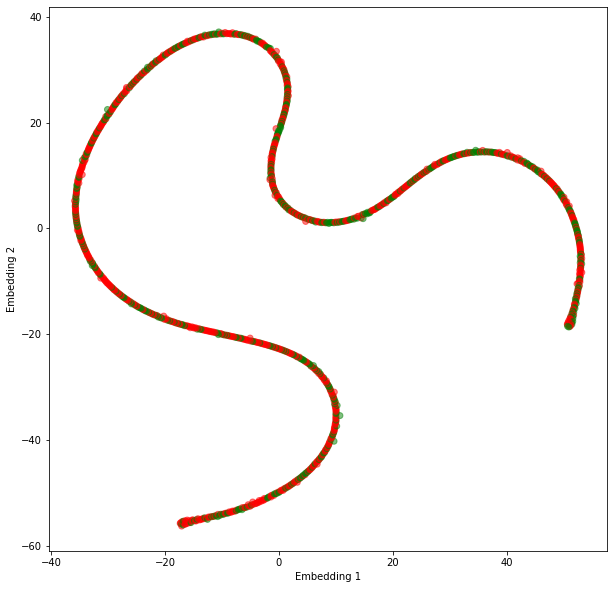

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
colors = ['rg'[j] for j in y.survived]
scat = ax.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c= colors,
    alpha = .5
)
ax.set_xlabel('Embedding 1')
ax.set_ylabel('Embedding 2')

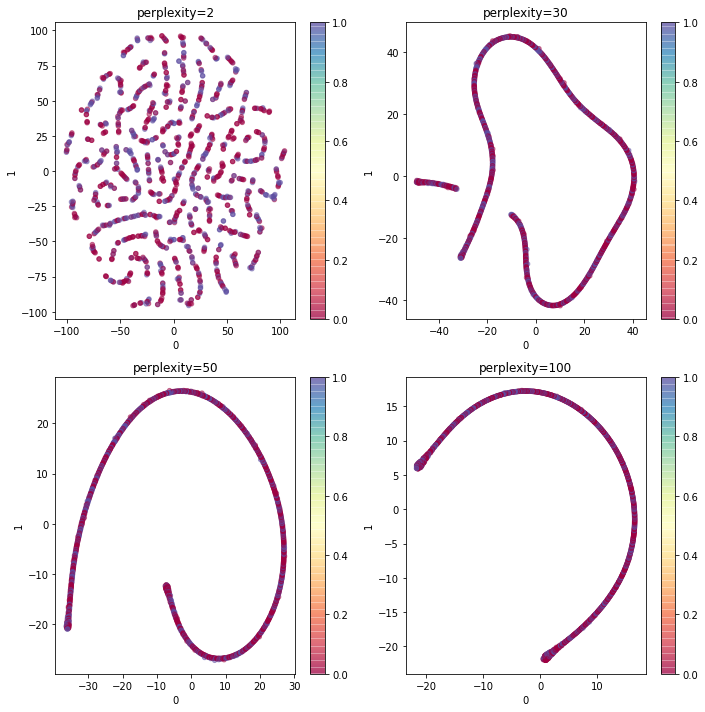

In [14]:

fig,axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.reshape(4)
for i,n in enumerate((2,30,50,100)):
    ax = axes[i]
    t = TSNE(random_state=42, perplexity=n)
    X_tsne = t.fit_transform(X)
    pd.DataFrame(X_tsne).plot(kind = 'scatter', x = 0, y = 1, ax = ax, c =y.survived,  cmap = 'Spectral', alpha =0.5)
    ax.set_title(f'perplexity={n}')
plt.tight_layout()

# PHATE

https://nbviewer.org/github/KrishnaswamyLab/PHATE/blob/master/Python/tutorial/EmbryoidBody.ipynb

Potential of Heat-diffision for Affinity-based Trajectory Embedding is a tool for visualization of high dimensional data. It tends to keep both global structure (like PCA) and local structure (as  t-SNE). 

PATHE first encodes local information (points close to each oterh should remain close). It uses diffusion to discover global data, then reduce dimensionality.


__Instance parameters__ 

*  `n_components = 2` Number of dimensions
* `knn = 5` Number of neighbors for the kernel. Increase of the embedding is disconnected or dataset is larger than 100,000 samples
* `decay = 40` Decay rate of kernel. Lowering this value increases graph connectivity. 
* `n_landmark = 2000` Landmarks to use
* `t = 'auto'` Diffusion power. Smoothing is performed on the data. Increase if embedding lacks structure. Decrease if structure is tight and compact. 
* `gamma = 1` Log potential between -1 and 1. If embedidngs are concetrated around a single point, try setting this to 0.
* `n_pca = 100` Number of principal components for neighborhood calculation. 
* `knn_dist = 'euclidean` KNN metric.
* `mds_dist = 'euclidean'` Multidimensional scaling metric.
* `mds = 'metric'` MDS algorithm for dimension reduction.
* `n_jobs = 1` Number of CPUs to use. 
* `random_state = None` Random seed
* `verbose = 1` Verbosity


__Attributes__ 

* `X` input data. 
* `embedding` Embedding space
* `diff_op` Diffusion operator
* `graph` KNN graph built from input

In [20]:
!pip install --user --upgrade phate scprep

In [23]:
import scprep
import phate 

p = phate.PHATE(random_state = 42)
X_phate = p.fit_transform(X)
X_phate.shape

Calculating PHATE...
  Running PHATE on 1309 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 1.77 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.98 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.81 seconds.
Calculated PHATE in 5.64 seconds.


(1309, 2)

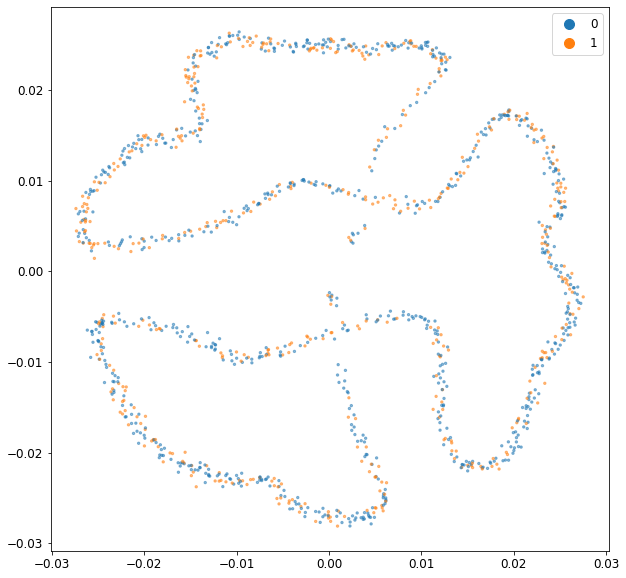

In [27]:
fig, ax = plt.subplots(figsize = (10,10))
scprep.plot.scatter2d(X_phate, c = y.survived, ax = ax, alpha = 0.5)

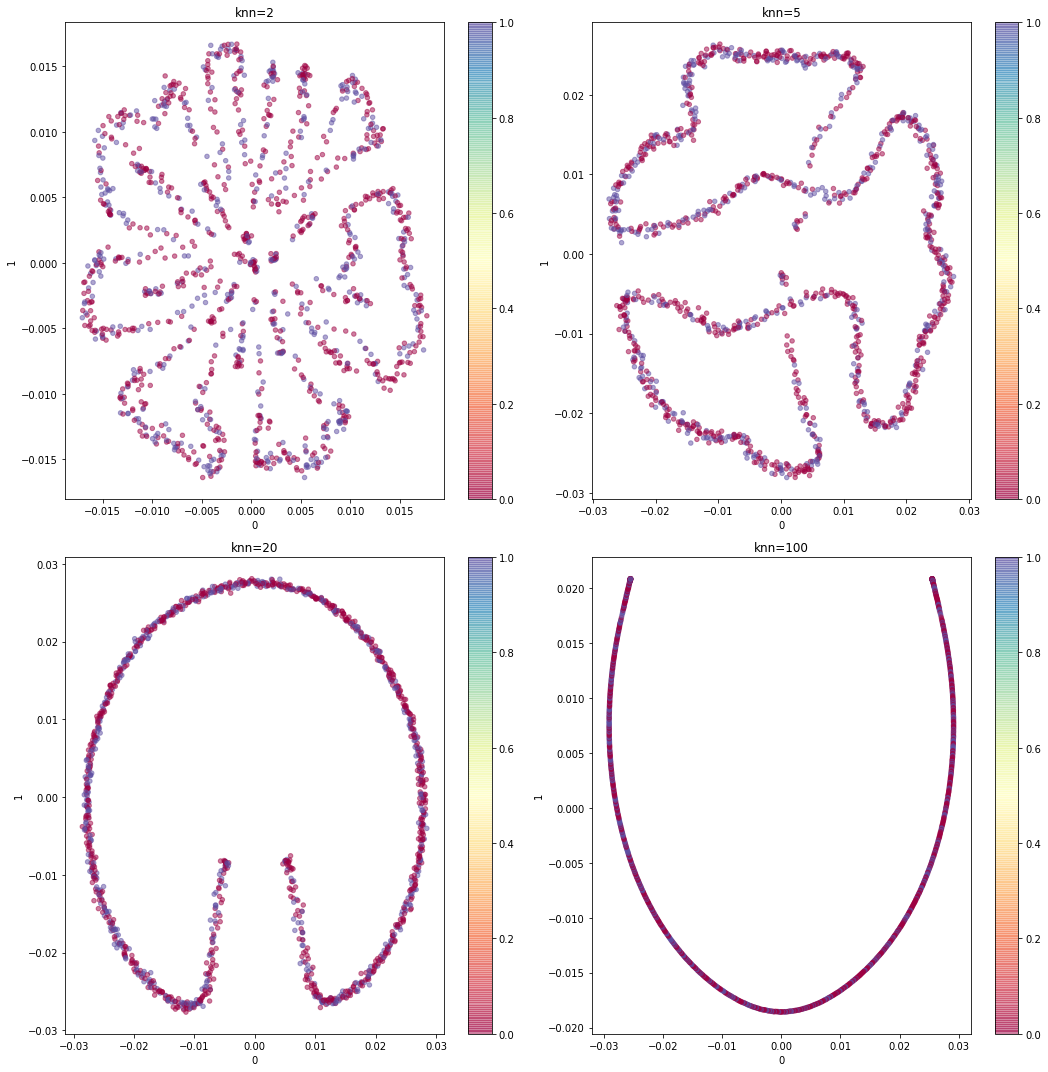

In [31]:
fig,axes = plt.subplots(2,2, figsize = (15,15))
axes = axes.reshape(4)
p = phate.PHATE(random_state=42, n_jobs=-1)

for i, n in enumerate((2,5,20,100)):
  ax = axes[i]
  p.set_params(knn=n, verbose = 0)
  X_phate = p.fit_transform(X)
  pd.DataFrame(X_phate).plot(
      kind = 'scatter', 
      x = 0, 
      y = 1, 
      ax = ax, 
      c = y.survived,
      cmap = 'Spectral',
      alpha = 0.5
  )
  ax.set_title(f'knn={n}')

plt.tight_layout()